# Determinación normalidad de una muestra

## 0.Preparación librerias y definición de fórmulas

In [2]:
#Importación de librerias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import shapiro

In [ ]:
#Definición de la fórmula de cálculo de residuos
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    predictions_df=pd.DataFrame(predictions,columns=['Predictions'])
    df_results = pd.DataFrame({'Actual': y.iloc[:,0], 'Predicted': predictions_df['Predictions']})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [47]:
#Definición de la hipotesis de normalidad 
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    
    print('Assumption: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed', '\n')
    else:
        print('Residuals are normally distributed', '\n')
    
    print('Using the Shapiro-Wilks test for normal distribution')
    shapiro_test = shapiro(df_results['Residuals'])
    shapiro_test_stat=shapiro_test[0]
    shapiro_test_pvalue=shapiro_test[1]
    print('p-value from the test - below 0.05 generally means non-normal:', shapiro_test_pvalue)
    
    # Reporting the normality of the residuals
    if shapiro_test_pvalue < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

## 1.Preanalisis de los datos

In [8]:
# Carga de datos
df=pd.read_csv('./datos/notasmatesingles.csv')

---Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Matematicas    30 non-null float64
Ingles         30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes

 ---Cinco primeros registros---
   Matematicas  Ingles
0         80.0    77.0
1         78.0    67.0
2         90.0    77.0
3         70.0    76.0
4         55.0    72.0 


 ---Scatter plot---


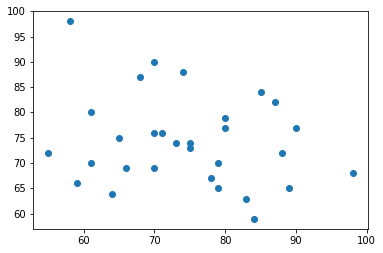

In [62]:
#Forma del dataframe
print('---Info---')
df.info()

#Impresion 5 primeras filas
print('\n','---Cinco primeros registros---')
print(df.head(),'\n')
print('\n','---Scatter plot---')
plt.scatter(df.iloc[:,0], df.iloc[:,1])

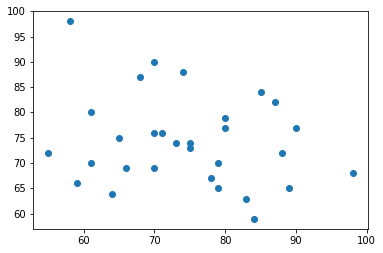

## 2. Comprobación de la normalidad

### Cálculo de la regresión lineal

In [35]:
# Creación del modelo
model = LinearRegression()

#Identificación de la variable independiente(X) y dependiente (Y)
X = pd.DataFrame(df.iloc[:,0])
y = pd.DataFrame(df.iloc[:,1])
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
#Imprsión de la pendiente y el punto de corte
print('intercept (b):', model.intercept_)
print('slope(m):', model.coef_)

intercept (b): [87.5755888]
slope(m): [[-0.17819582]]


In [49]:
#Cálculo de la estimación de Y (y_pred)
y_pred = model.predict(X)


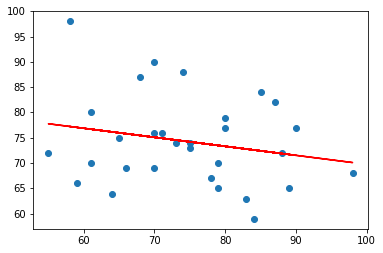

In [40]:
#Gráfica: Superposición regresión lineal nube de datos

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

### Cálculo de los residuos

In [44]:
df_results = calculate_residuals(model, X, y)

In [45]:
df_results

,Actual,Predicted,Residuals
0,77.0,73.319923,3.680077
1,67.0,73.676315,-6.676315
2,77.0,71.537965,5.462035
3,76.0,75.101881,0.898119
4,72.0,77.774819,-5.774819
5,66.0,77.062035,-11.062035
6,72.0,71.894356,0.105644
7,88.0,74.389098,13.610902
8,59.0,72.607140,-13.607140
9,69.0,75.814664,-6.814664


## Aplicación de la hipótesis de Normalidad

Assumption: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.2711452095714222
Residuals are normally distributed 

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.28228527307510376
Residuals are normally distributed


C:\Users\acesp\Anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)
C:\Users\acesp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


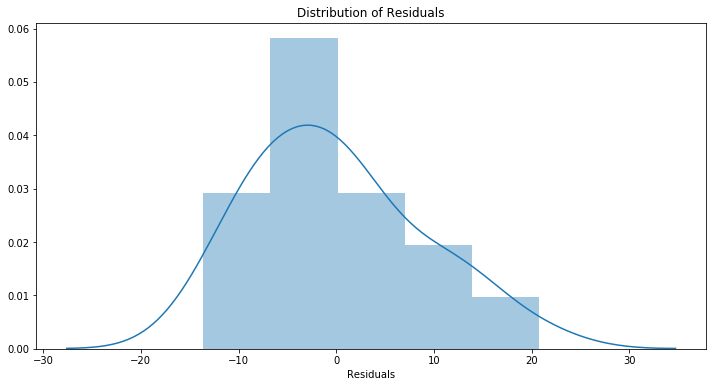


Assumption satisfied


In [48]:
normal_errors_assumption(model, X, y)